<a href="https://colab.research.google.com/github/lletridung/baitapai/blob/main/pre_train_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MTCNN
#multitask cascaded CNN
#keypoints


In [16]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from mtcnn import MTCNN
import matplotlib.pyplot as plt
import cv2


4/4 [==============================] - 0s 28ms/step


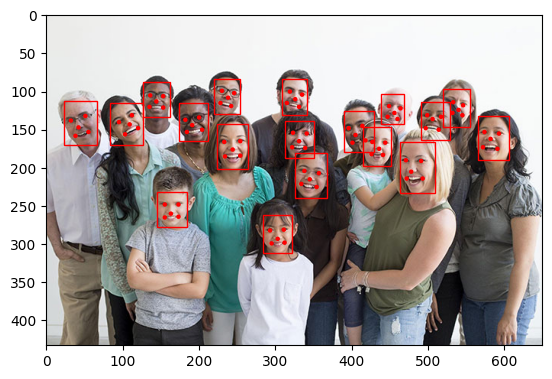

In [43]:
filename= '/content/drive/MyDrive/ABC.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)

plt.imshow(img)

for face in faces:
    x, y, width, height = face['box']
    rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
    plt.gca().add_patch(rect)

    for key, value in face['keypoints'].items():
        dot = plt.Circle(value, radius=2, color='red')
        plt.gca().add_patch(dot)
for i, result in enumerate(faces):
    x1, y1, width, height = result['box']
    x2, y2 = x1 + width, y1 + height
    face_img = img[y1:y2, x1:x2]
    cv2.imwrite(f'face_{i}.jpg', face_img)

plt.show()

In [31]:
from mtcnn import MTCNN
import matplotlib.pyplot as plt
import cv2

4/4 [==============================] - 0s 28ms/step


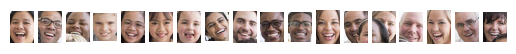

<Figure size 640x480 with 0 Axes>

In [37]:
def draw_faces(filename,result_list):
  data=plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,width,height=result_list[i]['box']
    x2,y2,=x1+width,y1+height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
  plt.show()
filename = '/content/drive/MyDrive/ABC.jpg'
img=plt.imread(filename)
detector=MTCNN()
faces=detector.detect_faces(img)
draw_faces(filename,faces)
plt.savefig('/content/drive/MyDrive/Takeout')

In [39]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02504013', 'Indian_elephant', 0.66176283), ('n02504458', 'African_elephant', 0.2694038), ('n01871265', 'tusker', 0.06652738)]


In [41]:
model = ResNet50(weights='imagenet')

img_path = 'kangaru.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 1s/step
Predicted: [('n01877812', 'wallaby', 0.95064956), ('n02326432', 'hare', 0.04401258), ('n02417914', 'ibex', 0.005104543)]


In [49]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 653ms/step
Predicted: [('n02504458', 'African_elephant', 0.67777425), ('n02504013', 'Indian_elephant', 0.21041448), ('n01871265', 'tusker', 0.107695125)]


In [50]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 521ms/step
Predicted: [('n02504458', 'African_elephant', 0.67777425), ('n02504013', 'Indian_elephant', 0.21041448), ('n01871265', 'tusker', 0.107695125)]


In [51]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(...)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(...)

87910968/87910968 [==============================] - 0s 0us/step


ValueError: ignored